In [1]:
import pandas as pd

In [2]:
df = pd.read_json("data/fragments_classification.jsonl", lines=True)

In [3]:
df

,text,label
0,Nie uzna gola. Robben był kilka metrów w polu ...,"[[0, 8, odwrócenie]]"
1,@USER No właśnie o tym jest ten tweet 😄,[]
2,@USER @USER Widać chcą wiecej polskich mord go...,"[[23, 38, wzmocnienie]]"
3,"Idę spać bo padam na twarz, w końcu w domuuuu",[]
4,@USER Tak się poznałam z moim chłopakiem 😂 cza...,[]
...,...,...
795,@USER Wszystkiego najlepszego z okazji urodzin...,"[[5, 29, wzmocnienie]]"
796,"@USER widzę, że pewne tweety działają jak magn...",[]
797,"@USER @USER Chociaż futro ma z jenota,\nTo nie...","[[43, 52, odwrócenie], [55, 67, wzmocnienie], ..."
798,@USER Ty aby nie zacząleś ćpać przez wydumane ...,"[[13, 25, odwrócenie], [37, 54, wzmocnienie]]"


In [4]:
unique_labels = set()
for label_list in df['label']:
    for _, _, label in label_list:
        unique_labels.add(label)

# Print all unique labels
print("Unique Labels:", unique_labels)

Unique Labels: {'wzmocnienie', 'osłabienie', 'odwrócenie'}


In [5]:
label_mapping = {'wzmocnienie': 0, 
                 'osłabienie': 1,
                 'odwrócenie': 2}

In [6]:
def map_labels(label_list, mapping):
    return [[start, end, mapping[label]] for start, end, label in label_list]

In [7]:
df['mapped_label'] = df['label'].apply(lambda x: map_labels(x, label_mapping))

In [8]:
df

,text,label,mapped_label
0,Nie uzna gola. Robben był kilka metrów w polu ...,"[[0, 8, odwrócenie]]","[[0, 8, 2]]"
1,@USER No właśnie o tym jest ten tweet 😄,[],[]
2,@USER @USER Widać chcą wiecej polskich mord go...,"[[23, 38, wzmocnienie]]","[[23, 38, 0]]"
3,"Idę spać bo padam na twarz, w końcu w domuuuu",[],[]
4,@USER Tak się poznałam z moim chłopakiem 😂 cza...,[],[]
...,...,...,...
795,@USER Wszystkiego najlepszego z okazji urodzin...,"[[5, 29, wzmocnienie]]","[[5, 29, 0]]"
796,"@USER widzę, że pewne tweety działają jak magn...",[],[]
797,"@USER @USER Chociaż futro ma z jenota,\nTo nie...","[[43, 52, odwrócenie], [55, 67, wzmocnienie], ...","[[43, 52, 2], [55, 67, 0], [77, 83, 0], [112, ..."
798,@USER Ty aby nie zacząleś ćpać przez wydumane ...,"[[13, 25, odwrócenie], [37, 54, wzmocnienie]]","[[13, 25, 2], [37, 54, 0]]"


In [9]:
def only_labels(label_list, mapping):
    return [mapping[label] for _, _, label in label_list]

In [10]:
df['only_label'] = df['label'].apply(lambda x: only_labels(x, label_mapping))

In [11]:
df

,text,label,mapped_label,only_label
0,Nie uzna gola. Robben był kilka metrów w polu ...,"[[0, 8, odwrócenie]]","[[0, 8, 2]]",[2]
1,@USER No właśnie o tym jest ten tweet 😄,[],[],[]
2,@USER @USER Widać chcą wiecej polskich mord go...,"[[23, 38, wzmocnienie]]","[[23, 38, 0]]",[0]
3,"Idę spać bo padam na twarz, w końcu w domuuuu",[],[],[]
4,@USER Tak się poznałam z moim chłopakiem 😂 cza...,[],[],[]
...,...,...,...,...
795,@USER Wszystkiego najlepszego z okazji urodzin...,"[[5, 29, wzmocnienie]]","[[5, 29, 0]]",[0]
796,"@USER widzę, że pewne tweety działają jak magn...",[],[],[]
797,"@USER @USER Chociaż futro ma z jenota,\nTo nie...","[[43, 52, odwrócenie], [55, 67, wzmocnienie], ...","[[43, 52, 2], [55, 67, 0], [77, 83, 0], [112, ...","[2, 0, 0, 0]"
798,@USER Ty aby nie zacząleś ćpać przez wydumane ...,"[[13, 25, odwrócenie], [37, 54, wzmocnienie]]","[[13, 25, 2], [37, 54, 0]]","[2, 0]"


In [12]:
label_types = [0, 1, 2]
for label in label_types:
    df[f'label_{label}_count'] = df['only_label'].apply(lambda x: x.count(label))

In [13]:
df

,text,label,mapped_label,only_label,label_0_count,label_1_count,label_2_count
0,Nie uzna gola. Robben był kilka metrów w polu ...,"[[0, 8, odwrócenie]]","[[0, 8, 2]]",[2],0,0,1
1,@USER No właśnie o tym jest ten tweet 😄,[],[],[],0,0,0
2,@USER @USER Widać chcą wiecej polskich mord go...,"[[23, 38, wzmocnienie]]","[[23, 38, 0]]",[0],1,0,0
3,"Idę spać bo padam na twarz, w końcu w domuuuu",[],[],[],0,0,0
4,@USER Tak się poznałam z moim chłopakiem 😂 cza...,[],[],[],0,0,0
...,...,...,...,...,...,...,...
795,@USER Wszystkiego najlepszego z okazji urodzin...,"[[5, 29, wzmocnienie]]","[[5, 29, 0]]",[0],1,0,0
796,"@USER widzę, że pewne tweety działają jak magn...",[],[],[],0,0,0
797,"@USER @USER Chociaż futro ma z jenota,\nTo nie...","[[43, 52, odwrócenie], [55, 67, wzmocnienie], ...","[[43, 52, 2], [55, 67, 0], [77, 83, 0], [112, ...","[2, 0, 0, 0]",3,0,1
798,@USER Ty aby nie zacząleś ćpać przez wydumane ...,"[[13, 25, odwrócenie], [37, 54, wzmocnienie]]","[[13, 25, 2], [37, 54, 0]]","[2, 0]",1,0,1


In [14]:
import matplotlib.pyplot as plt

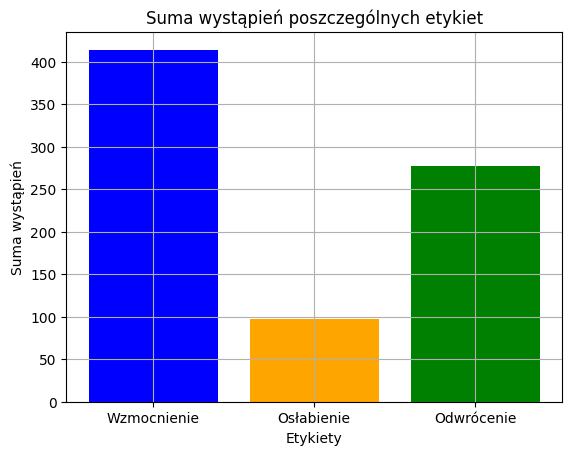

In [21]:
label_sums = {
    'Wzmocnienie': df['label_0_count'].sum(),
    'Osłabienie': df['label_1_count'].sum(),
    'Odwrócenie': df['label_2_count'].sum()
}

plt.bar(label_sums.keys(), label_sums.values(), color=['blue', 'orange', 'green'])
plt.xlabel('Etykiety')
plt.ylabel('Suma wystąpień')
plt.title('Suma wystąpień poszczególnych etykiet')
plt.grid(True)
plt.show()

In [16]:
df['text_length'] = df['text'].apply(len)

In [17]:
df

,text,label,mapped_label,only_label,label_0_count,label_1_count,label_2_count,text_length
0,Nie uzna gola. Robben był kilka metrów w polu ...,"[[0, 8, odwrócenie]]","[[0, 8, 2]]",[2],0,0,1,96
1,@USER No właśnie o tym jest ten tweet 😄,[],[],[],0,0,0,39
2,@USER @USER Widać chcą wiecej polskich mord go...,"[[23, 38, wzmocnienie]]","[[23, 38, 0]]",[0],1,0,0,61
3,"Idę spać bo padam na twarz, w końcu w domuuuu",[],[],[],0,0,0,45
4,@USER Tak się poznałam z moim chłopakiem 😂 cza...,[],[],[],0,0,0,56
...,...,...,...,...,...,...,...,...
795,@USER Wszystkiego najlepszego z okazji urodzin...,"[[5, 29, wzmocnienie]]","[[5, 29, 0]]",[0],1,0,0,89
796,"@USER widzę, że pewne tweety działają jak magn...",[],[],[],0,0,0,50
797,"@USER @USER Chociaż futro ma z jenota,\nTo nie...","[[43, 52, odwrócenie], [55, 67, wzmocnienie], ...","[[43, 52, 2], [55, 67, 0], [77, 83, 0], [112, ...","[2, 0, 0, 0]",3,0,1,118
798,@USER Ty aby nie zacząleś ćpać przez wydumane ...,"[[13, 25, odwrócenie], [37, 54, wzmocnienie]]","[[13, 25, 2], [37, 54, 0]]","[2, 0]",1,0,1,55


In [18]:
import seaborn as sns

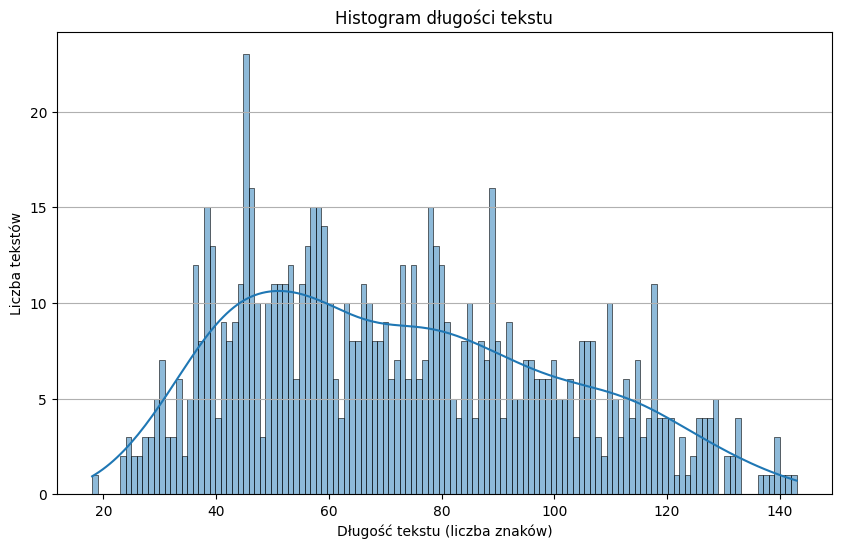

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=max(df['text_length']) - min(df['text_length']) + 1, kde=True)

plt.title('Histogram długości tekstu')
plt.xlabel('Długość tekstu (liczba znaków)')
plt.ylabel('Liczba tekstów')
plt.grid(axis='y')

plt.show()

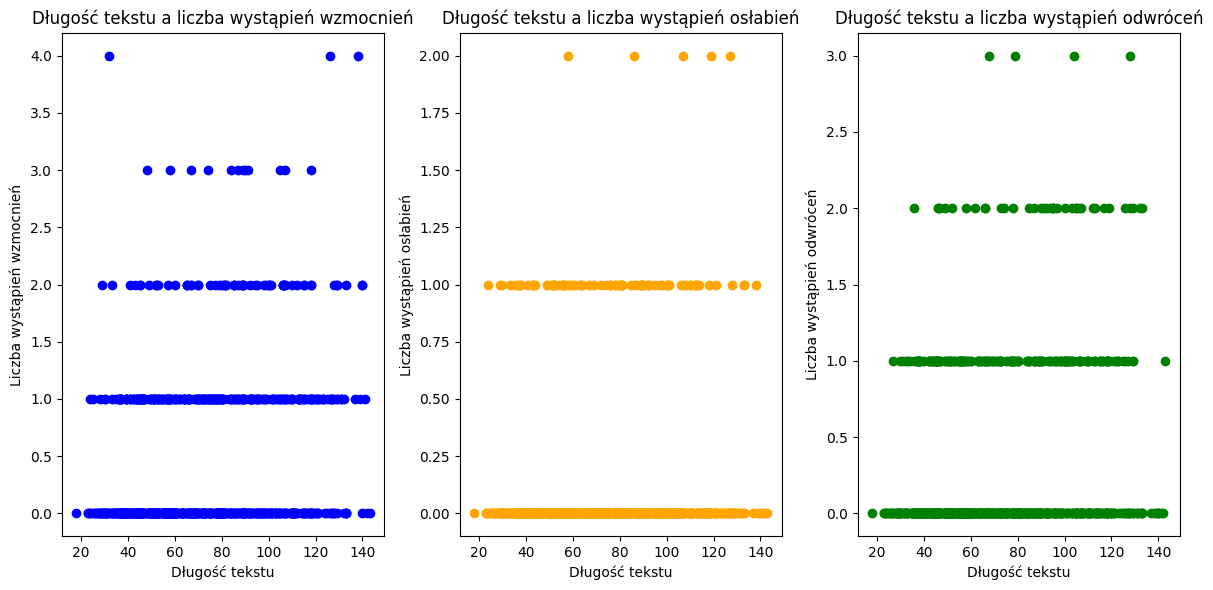

In [23]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(df['text_length'], df['label_0_count'], color='blue')
plt.title('Długość tekstu a liczba wystąpień wzmocnień')
plt.xlabel('Długość tekstu')
plt.ylabel('Liczba wystąpień wzmocnień')

plt.subplot(1, 3, 2)
plt.scatter(df['text_length'], df['label_1_count'], color='orange')
plt.title('Długość tekstu a liczba wystąpień osłabień')
plt.xlabel('Długość tekstu')
plt.ylabel('Liczba wystąpień osłabień')

plt.subplot(1, 3, 3)
plt.scatter(df['text_length'], df['label_2_count'], color='green')
plt.title('Długość tekstu a liczba wystąpień odwróceń')
plt.xlabel('Długość tekstu')
plt.ylabel('Liczba wystąpień odwróceń')

plt.tight_layout()

plt.show()

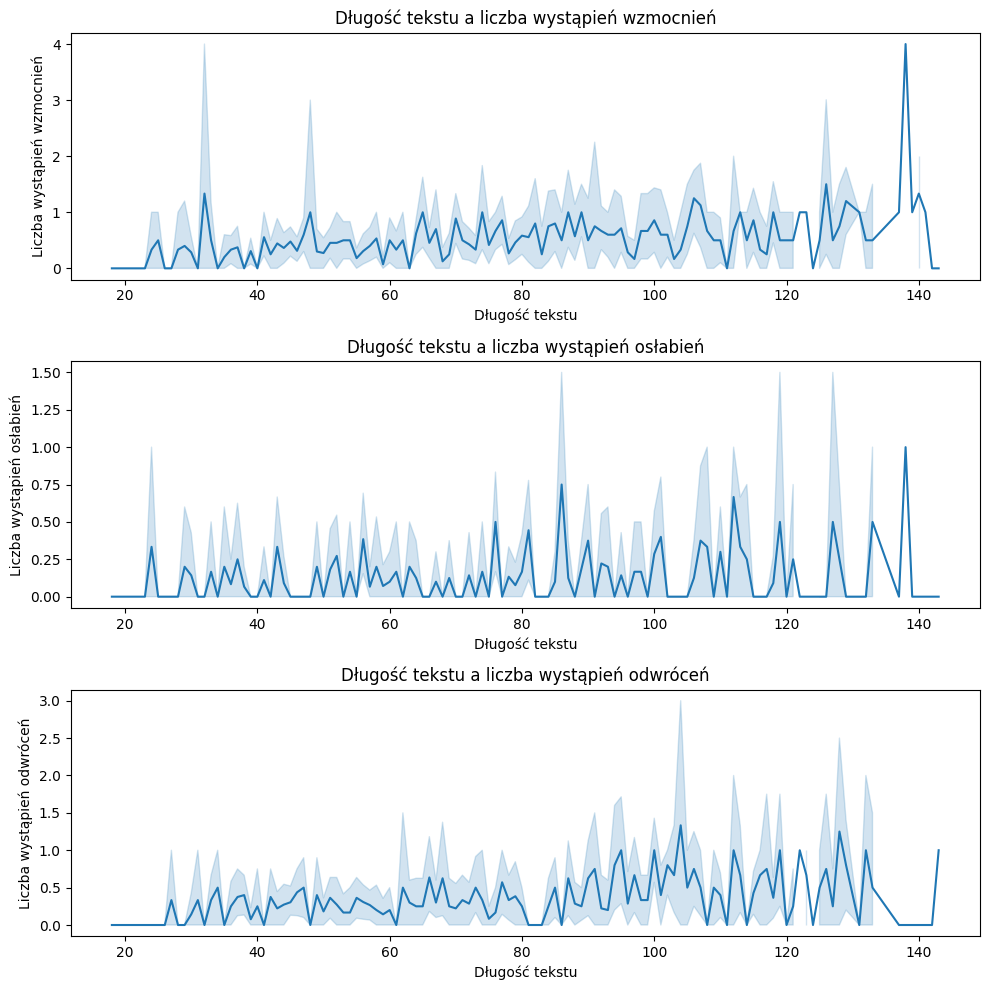

In [25]:
plt.figure(figsize=(10, 10))
plt.subplot(3,1,1)
sns.lineplot(x='text_length', y='label_0_count', data=df)
plt.title('Długość tekstu a liczba wystąpień wzmocnień')
plt.xlabel('Długość tekstu')
plt.ylabel('Liczba wystąpień wzmocnień')

plt.subplot(3,1,2)
sns.lineplot(x='text_length', y='label_1_count', data=df)
plt.title('Długość tekstu a liczba wystąpień osłabień')
plt.xlabel('Długość tekstu')
plt.ylabel('Liczba wystąpień osłabień')

plt.subplot(3,1,3)
sns.lineplot(x='text_length', y='label_2_count', data=df)
plt.title('Długość tekstu a liczba wystąpień odwróceń')
plt.xlabel('Długość tekstu')
plt.ylabel('Liczba wystąpień odwróceń')

plt.tight_layout()
plt.show()

In [26]:
correlations = df[['text_length', 'label_0_count', 'label_1_count', 'label_2_count']].corr()
print(correlations)

               text_length  label_0_count  label_1_count  label_2_count
text_length       1.000000       0.214994       0.077762       0.168264
label_0_count     0.214994       1.000000      -0.015732      -0.006723
label_1_count     0.077762      -0.015732       1.000000       0.002529
label_2_count     0.168264      -0.006723       0.002529       1.000000


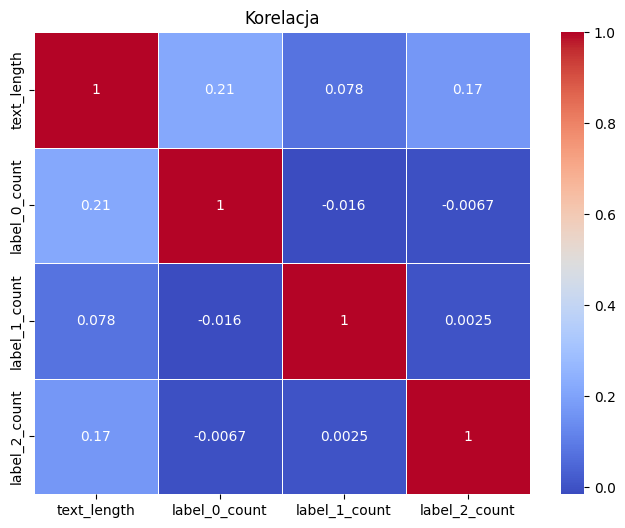

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelacja')
plt.show()